# Assignment 7 - Image Processing with a CNN
MSDS 422 - SEC 57 THURSDAY

FERDYNAND HEBAL - 8/11/2019

In this assignment, convolutional neural network structures are explored within a 2x2 full factorial/crossed benchmark experiment on the Dogs vs. Cats problem on Kaggle.com. Model performance accuracy and processing times are assessed using Keras and TensorFlow. Due to the time required to fit each model only 5000 of the 25000 available images are used. Results are presented in Table 1. 

In [1]:
# import base packages
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import os 
import cv2
from tqdm import tqdm_notebook
from random import shuffle
import shutil
import pandas as pd

# Data preparation, exploration, visualization
Train data from the Dog vs Cats problem is used to construct a file tree splitting the dataset into a train and validation set. The total number of images n = 5000 and the ratio of validation set r = 0.2

In [2]:
def organize_datasets(path_to_data, n=4000, ratio=0.2):
    files = os.listdir(path_to_data)
    files = [os.path.join(path_to_data, f) for f in files]
    shuffle(files) #shuffles files
    files = files[:n]
    
    n = int(len(files) * ratio)
    val, train = files[:n], files[n:]
    
    shutil.rmtree('./data/') #remove existing data in file tree to be used for modeling
    print('/data/ removed') 

    for c in ['dogs', 'cats']: #create directories
        os.makedirs('./data/train/{0}/'.format(c))
        os.makedirs('./data/validation/{0}/'.format(c))

    print('folders created !')

    for t in tqdm_notebook(train): #copy files from to train directory
        if 'cat' in t:
            shutil.copy2(t, os.path.join('.', 'data', 'train', 'cats'))
        else:
            shutil.copy2(t, os.path.join('.', 'data', 'train', 'dogs'))
     
    for v in tqdm_notebook(val): #copy files from to validation directory
        if 'cat' in v:
            shutil.copy2(v, os.path.join('.', 'data', 'validation', 'cats'))
        else:
            shutil.copy2(v, os.path.join('.', 'data', 'validation', 'dogs'))        
    print('Data copied!')

In [3]:
ratio = 0.2
n = 5000

In [4]:
train_path = '/Users/ferdynandhebal/Documents/scl/msds422/Assignment 7 - Image Processing with a CNN/train/'
organize_datasets(path_to_data=train_path, n=n, ratio=ratio)

/data/ removed
folders created !



Data copied!


# Review research design and modeling methods
Source code from https://ahmedbesbes.com/understanding-deep-convolutional-neural-networks-with-a-practical-use-case-in-tensorflow-and-keras.html was used as a template to develop this experiment. Notes on the model architecture: The fit_generator method, a variant of the standard fit method, is used. Models are trained over 50 epochs, e.g. over one epoch, 5000 images flow by a batch of 32 to the network adjusting the weights with Stochastic gradient descent due the high cost of running over the full training set. Two fully connected layers and used in each model and dropout is used to prevent overfitting.

In [5]:
#import Keras
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import Callback

Using TensorFlow backend.


In [6]:
batch_size = 32

File generators are used to generate batches of tensor image data with augmentation.

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True
                                    )
val_datagen = ImageDataGenerator(rescale=1/255.)

In [8]:
train_generator = train_datagen.flow_from_directory(
        './data/train/',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        './data/validation/',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# For this experiment, the following model structures are evaluated:

A CNN with 3 convolution layers, two fully connected layers and 10 3x3 filters

A CNN with 3 convolution layers, two fully connected layers and 20 3x3 filters

A CNN with 5 convolution layers, two fully connected layers and 10 3x3 filters

A CNN with 5 convolution layers, two fully connected layers and 20 3x3 filters

In [9]:
#A CNN with 3 convolution layers, two fully connected layers and 10 3x3 filters
model_1 = Sequential()

model_1.add(Conv2D(10, (3, 3), input_shape=(150, 150, 3), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(10, (3, 3), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(10, (3, 3), activation='relu', padding='same'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(2, activation='softmax'))

epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model_1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
#A CNN with 3 convolution layers, two fully connected layers and 20 3x3 filters
model_2 = Sequential()

model_2.add(Conv2D(20, (3, 3), input_shape=(150, 150, 3), padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(20, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))


model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(2, activation='softmax'))

epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model_2.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [11]:
#A CNN with 5 convolution layers, two fully connected layers and 10 3x3 filters
model_3 = Sequential()

model_3.add(Conv2D(10, (3, 3), input_shape=(150, 150, 3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(10, (3, 3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(10, (3, 3), activation='relu', padding='same'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(10, (3, 3), activation='relu', padding='same'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(10, (3, 3), activation='relu', padding='same'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))


model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(2, activation='softmax'))

epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model_3.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [12]:
#A CNN with 5 convolution layers, two fully connected layers and 20 3x3 filters
model_4 = Sequential()

model_4.add(Conv2D(20, (3, 3), input_shape=(150, 150, 3), padding='same', activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(20, (3, 3), activation='relu', padding='same'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(20, (3, 3), activation='relu', padding='same'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(20, (3, 3), activation='relu', padding='same'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))


model_4.add(Dropout(0.25))
model_4.add(Flatten())
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(2, activation='softmax'))

epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model_4.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
history = LossHistory()

## Callback for early stopping the training
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

In [14]:
# defined function to run models and visualize performance results
def model_run(model):
    fitted_model = model_1.fit_generator(
            train_generator,
            steps_per_epoch= int(n * (1-ratio)) // batch_size,
            epochs=50,
            validation_data=validation_generator,
            validation_steps= int(n * ratio) // batch_size,
            callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True), early_stopping, history],
            verbose=0)

    losses, val_losses = history.losses, history.val_losses
    fig = plt.figure(figsize=(15, 5))
    plt.plot(fitted_model.history['acc'], 'g', label="accuracy on train set")
    plt.plot(fitted_model.history['val_acc'], 'r', label="accuracy on validation set")
    plt.grid(True)
    plt.title('Training Accuracy vs. Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

Instructions for updating:
Use tf.cast instead.


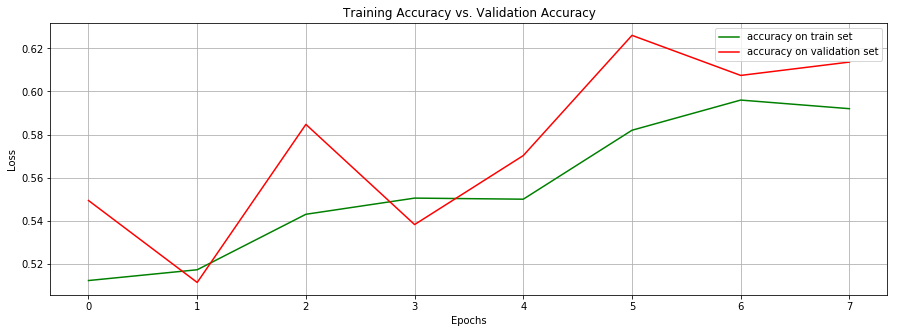

In [15]:
model_run(model_1)

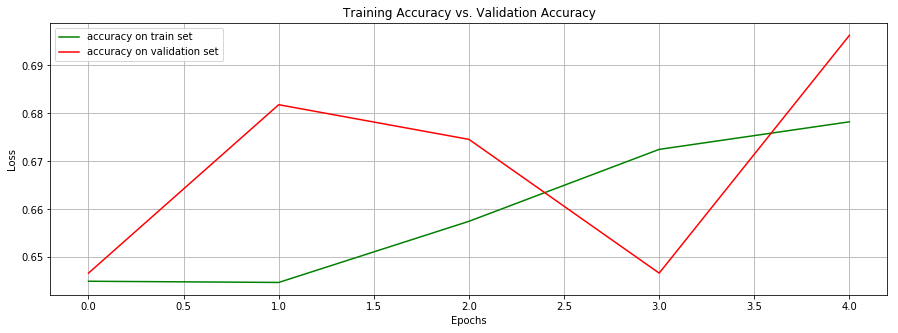

In [16]:
model_run(model_2)

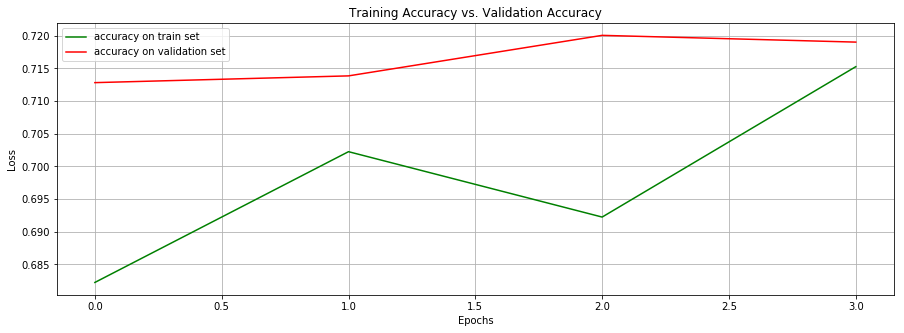

In [17]:
model_run(model_3)

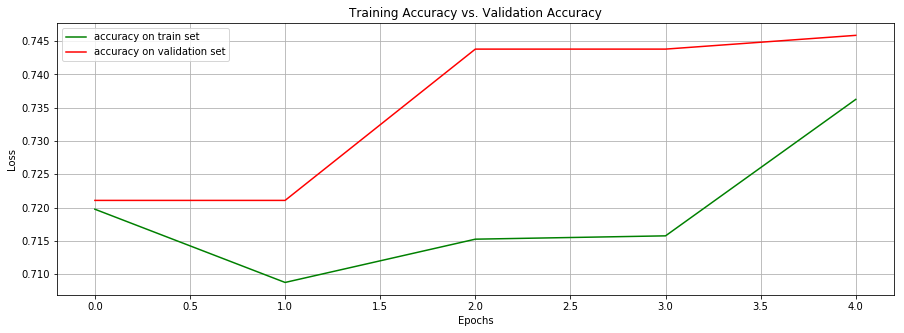

In [18]:
model_run(model_4)

In [45]:

model_1 = pd.DataFrame(['0.664', '0.592', '0.651', '0.614', '8', '07:01']).T
model_2 = pd.DataFrame(['0.606', '0.678', '0.589', '0.696','5','04:03']).T
model_3 = pd.DataFrame(['0.568', '0.715', '0.561', '0.719','4','03:28']).T
model_4 = pd.DataFrame(['0.536', '0.736', '0.561', '0.746','4','04:25']).T

table_1 = model_1.append(model_2).append(model_3).append(model_4)
table_1.columns = ['loss', 'acc', 'val_loss', 'val_acc', 'epochs', 'runtime']
table_1.append(pd.DataFrame(model_2).T)

table_1 = table_1.reset_index().drop(columns='index')

table_1 = pd.DataFrame(['model 1','model 2','model 3','model 4']).join(table_1)
table_1 = table_1.rename(columns={0:'model'})


print('Table 1: Keras + Tensor Flow Multi-layer Convolutional Neural Network.')
table_1

Table 1: Keras + Tensor Flow Multi-layer Convolutional Neural Network.


,model,loss,acc,val_loss,val_acc,epochs,runtime
0,model 1,0.664,0.592,0.651,0.614,8,07:01
1,model 2,0.606,0.678,0.589,0.696,5,04:03
2,model 3,0.568,0.715,0.561,0.719,4,03:28
3,model 4,0.536,0.736,0.561,0.746,4,04:25


# Summary

Regarding the management problem, these results suggest that convolutional neural networks with a greater number of layers perform better given the same number of filters, and similarly perform better with a great number of nodes given the same number of layers. The increase in number of layers seems to incur a greater cost in processing time than does the number of nodes. It is clear that even with a simple convolutional neural network structure a the training time is high. That being said it seems that convolutional networks are a powerful and efficient technique in a computer vision application such as this given the reduced dataset and relatively simple architecture with few layers and filters.

model 1 reached 61.4% accuracy on 8 epochs,taking ~7 minutes to complete.

model 2 reached 69.6% accuracy on 5 epochs, taking ~4 minutes to complete.

model 3 reached 71.9% accuracy on 4 epochs,taking ~3.5 minutes to complete .

model 4 reached 74.6% accuracy on 4 epochs,taking ~4.5 minutes to complete.

Considering the results from this benchmark study I would conclude that CNN classifier with 5 layers and 20 filters per can be used but further testing is necessary. A number of network hyperparameters can be adjusted, e.g. the number of convolution layers, the number of filters, the size of the filters, introduce additional fully connected layers, use a different optimizer, etc...

From the perspective of a website provider evaluating machine learning technologies for automatically labeling images provided by end users I would recommend CNN technique given these parameters with the caveat that additional layers and filters, or other hyperparameter adjustments may result in higher accuracy but performance times will suffer and the risk overfitting can increases wihtout appropriate adjustments, e.g. more aggressive dropout etc... Depending on the needs of the client (e.g. accuracy vs training costs) these factors shoudl be considered and further testing conducted.